In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline
#allows us to directly interact with the plots
from scipy import stats

UsageError: unrecognized arguments: #allows us to directly interact with the plots


In [32]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())


Missing values per column:
Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64


In [34]:
# Drop rows with missing values
data_cleaned = data.dropna()

In [57]:
# Finding logical value near 1400
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False)

112     1320.0
138     1320.0
115     1280.0
119     1275.0
68      1275.0
         ...  
605     1000.0
1410    1000.0
1375    1000.0
1030    1000.0
1391    1000.0
Name: Weight, Length: 1430, dtype: float64

# Data description
The meaning of each column in the data is as below:

Price: The Price of the car in dollars
Age: The age of the car in months
KM: How many KMS did the car was used
FuelType: Petrol/Diesel/CNG car
HP: Horse power of the car
MetColor: Whether car has metallic color or not
Automatic: Whether car has automatic transmission or not
CC: The engine size of the car
Doors: The number of doors in the car
Weight: The weight of the car

In [3]:
CarPricesData=pd.read_csv(r'C:\Users\adity\Downloads\CarPricesData (1).csv')

In [4]:
# Printing sample data
CarPricesData.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [6]:
# Removing duplicate rows if any
CarPricesData=CarPricesData.drop_duplicates()

# PROBLEM STATEMENT:
    Create a ML Model that can predict the accurate price of a car
    by using predictors like age,km,fueltype,cc etc

<AxesSubplot:>

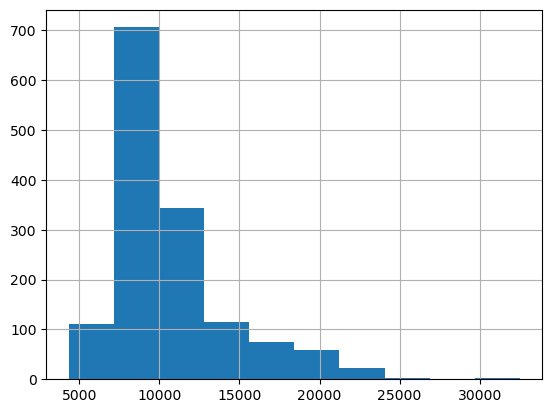

In [14]:
#Checking skewness of distribution of target variable (Price)
#if the skewness is too much then predictive modelling will be inaccurate/impossible

%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
CarPricesData['Price'].hist()

In [ ]:
# the skewness of the distribution of PRICE is satisfactory and we are good to proceed  

# BASIC EDA

In [15]:
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [16]:
# Looking at the descriptive statistics of the data
CarPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [17]:
# Finding unique values of each column
CarPricesData.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

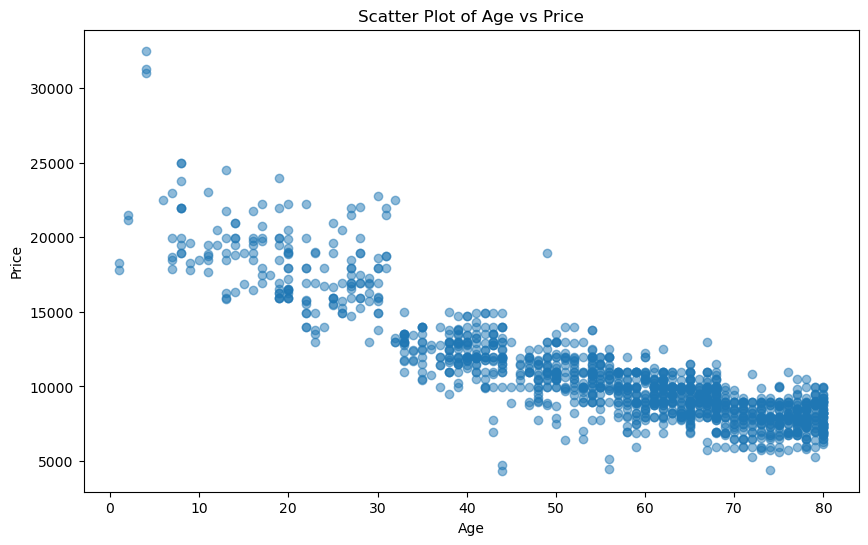

In [19]:
# Scatter plot of Age of car against Price of car 
plt.figure(figsize=(10, 6))
plt.scatter(CarPricesData['Age'], CarPricesData['Price'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Scatter Plot of Age vs Price')
plt.show()

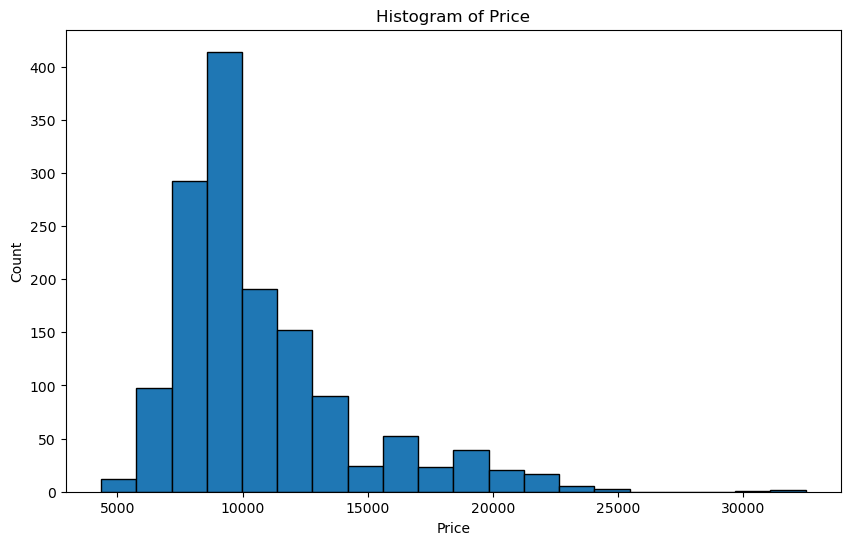

In [20]:
# Histogram of Cars under a certain price range

plt.figure(figsize=(10, 6))
plt.hist(CarPricesData['Price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Price')
plt.show()

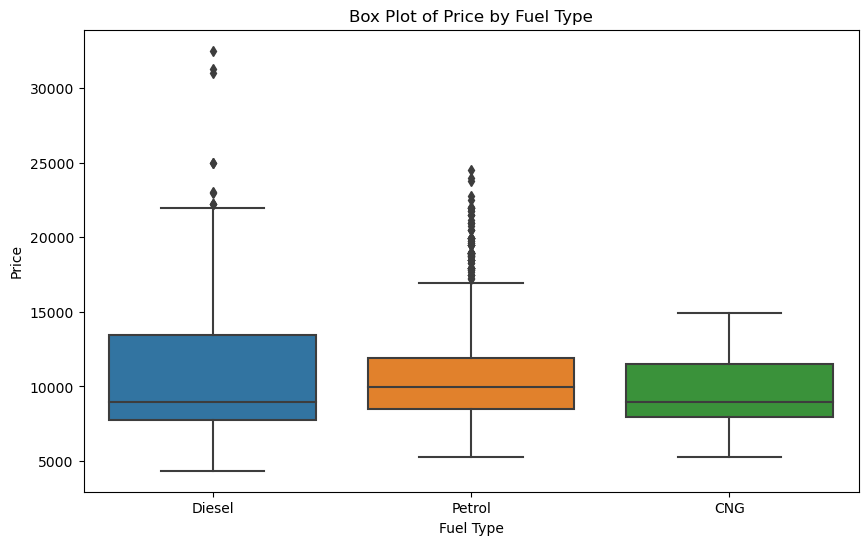

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='FuelType', y='Price', data=CarPricesData)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Box Plot of Price by Fuel Type')
plt.show()

this plot shows the variability of car prices by fuel type is not too large. prices range from 5000 to about 23000. 
most outliers are observed in fuel type petrol maybe due to spike in petrol prices and availability or maybe due to the
large sample size of petrol cars

In [52]:
# Treating missing values of categorical variable with MODE value
CarPricesData['FuelType'].fillna(value=CarPricesData['FuelType'].mode()[0], inplace=True)
CarPricesData['CC'].fillna(value=CarPricesData['CC'].mode()[0], inplace=True)

In [53]:
# Treating missing values of continuous variable with Median value
CarPricesData['Weight'].fillna(value=CarPricesData['Weight'].median(), inplace=True)
CarPricesData['Age'].fillna(value=CarPricesData['Age'].median(), inplace=True)

In [54]:
# Checking missing values again after the treatment
CarPricesData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

### ML MODEL BUILDING

Firstly, I have run a simple ANOVA Test to check if there is any relationship between the continuous variable 
or the target variable (price) and the other categorical variables

H0: There is no relationship between the categorical and continuous variables
HA: There is a relationship between the categorical and continuous variables

There should be no correlation between categorical and continuous variables for the model to be accurate


In [58]:
### NORMALIZATION of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [60]:
CategoricalPredictorList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
FunctionAnova(inpData=CarPricesData, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

FuelType is NOT correlated with Price | P-Value: 0.07590511356326429
HP is correlated with Price | P-Value: 4.403061434008212e-109
MetColor is correlated with Price | P-Value: 4.4173957971674025e-05
Automatic is NOT correlated with Price | P-Value: 0.19897717506836016
CC is correlated with Price | P-Value: 2.566835080246702e-47
Doors is correlated with Price | P-Value: 9.51180734144394e-13


['HP', 'MetColor', 'CC', 'Doors']

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv(r'C:\Users\adity\Downloads\CarPricesData (1).csv')

In [62]:
SelectedColumns=['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors']

# Selecting final columns
DataForML=CarPricesData[SelectedColumns]
DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


In [63]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [65]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=CarPricesData['Price']

# Printing sample rows
DataForML_Numeric.head()

#Here i have, converted nominal values into numeric using get dummies function 

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


#### SPLITTING TRAIN AND TEST 

In [66]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

### MLR and model deployment

In [75]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))



LinearRegression()
R2 Value: 0.8639079225489552


In [77]:
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())


# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0  11900         11955.0
1   8500          8301.0
2  24500         18332.0
3  11750         11333.0
4  13750         13966.0

Accuracy values for 10-fold Cross Validation:
 [88.56760465 89.10169587 88.14261529 91.92822999 89.53895835 91.5881939
 90.90567085 87.37511596 90.38793752 88.41900007]

Final Average Accuracy of the model: 89.6


##### R2 value is 0.86 or 86% of the variation in the target variable (price) can be explained by the predictors (metcolor, cc,age etc)